In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# ------------------------<game_info_df>--------------------------------------------------

In [3]:
# 1. games.csv 정리

In [4]:
games_df = pd.read_csv('./data/games.csv')

In [5]:
games_df.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67421 entries, 0 to 67420
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67421 non-null  int64  
 1   competition_id          67421 non-null  object 
 2   season                  67421 non-null  int64  
 3   round                   67421 non-null  object 
 4   date                    67421 non-null  object 
 5   home_club_id            67421 non-null  int64  
 6   away_club_id            67421 non-null  int64  
 7   home_club_goals         67421 non-null  int64  
 8   away_club_goals         67421 non-null  int64  
 9   home_club_position      47449 non-null  float64
 10  away_club_position      47449 non-null  float64
 11  home_club_manager_name  66675 non-null  object 
 12  away_club_manager_name  66675 non-null  object 
 13  stadium                 67207 non-null  object 
 14  attendance              57718 non-null

In [7]:
games_df.isnull().sum()

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        19972
away_club_position        19972
home_club_manager_name      746
away_club_manager_name      746
stadium                     214
attendance                 9703
referee                     598
url                           0
home_club_formation        6598
away_club_formation        6452
home_club_name            11450
away_club_name            10212
aggregate                     0
competition_type              0
dtype: int64

In [8]:
# 1) games_df의 competition_id == 'GB1' 이외의 행 삭제

In [9]:
games_df = games_df[games_df['competition_id'] == 'GB1']

In [10]:
# 2) date컬럼 날짜형식으로 바꾸고 2018-08-01 이후의 행만 남기고 삭제

In [11]:
# date컬럼 str -> datetime type으로 변형

games_df['date'] = pd.to_datetime(games_df['date'])

In [12]:
# 2018-08-01 이후의 행만 남기고 삭제

games_df = games_df[games_df['date'] >= '2018-08-01']

In [13]:
games_df.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1876,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,John Smith's Stadium,24121.0,Chris Kavanagh,https://www.transfermarkt.co.uk/huddersfield-t...,3-5-2 flat,4-3-3 Attacking,Huddersfield Town,Chelsea Football Club,0:3,domestic_league
1877,3050215,GB1,2018,5. Matchday,2018-09-15,1010,985,1,2,4.0,...,Vicarage Road,20537.0,Mike Dean,https://www.transfermarkt.co.uk/watford-fc_man...,4-4-2,4-2-3-1,Watford FC,Manchester United Football Club,1:2,domestic_league
1878,3050250,GB1,2018,9. Matchday,2018-10-20,631,985,2,2,3.0,...,Stamford Bridge,40721.0,Mike Dean,https://www.transfermarkt.co.uk/chelsea-fc_man...,4-3-3 Attacking,4-3-3 Attacking,Chelsea Football Club,Manchester United Football Club,2:2,domestic_league
1879,3050264,GB1,2018,10. Matchday,2018-10-27,180,762,0,0,16.0,...,St Mary's Stadium,30736.0,Chris Kavanagh,https://www.transfermarkt.co.uk/southampton-fc...,4-4-2 double 6,4-4-2 double 6,Southampton FC,Newcastle United Football Club,0:0,domestic_league
1880,3050336,GB1,2018,17. Matchday,2018-12-15,543,989,2,0,7.0,...,Molineux Stadium,30997.0,Simon Hooper,https://www.transfermarkt.co.uk/wolverhampton-...,3-5-2,3-4-2-1,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,2:0,domestic_league


In [14]:
# 3) 'competition_id', 'round', 'stadium', 'url', 'aggregate', 'competition_type'컬럼 삭제

games_df = games_df.drop(['competition_id', 'round', 'stadium', 'url', 'aggregate', 'competition_type', \
                          'home_club_name', 'away_club_name'], axis=1)

In [15]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   season                  2183 non-null   int64         
 2   date                    2183 non-null   datetime64[ns]
 3   home_club_id            2183 non-null   int64         
 4   away_club_id            2183 non-null   int64         
 5   home_club_goals         2183 non-null   int64         
 6   away_club_goals         2183 non-null   int64         
 7   home_club_position      2183 non-null   float64       
 8   away_club_position      2183 non-null   float64       
 9   home_club_manager_name  2183 non-null   object        
 10  away_club_manager_name  2183 non-null   object        
 11  attendance              1728 non-null   float64       
 12  referee                 2183 non-null   object   

In [16]:
games_df.shape

(2183, 15)

In [17]:
games_df.head()

,game_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
1876,3050170,2018,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking
1877,3050215,2018,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,José Mourinho,20537.0,Mike Dean,4-4-2,4-2-3-1
1878,3050250,2018,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,4-3-3 Attacking
1879,3050264,2018,2018-10-27,180,762,0,0,16.0,19.0,Mark Hughes,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,4-4-2 double 6
1880,3050336,2018,2018-12-15,543,989,2,0,7.0,11.0,Nuno Espírito Santo,Eddie Howe,30997.0,Simon Hooper,3-5-2,3-4-2-1


In [18]:
# attendance null값 0으로 대체

In [19]:
games_df['attendance'] = games_df['attendance'].fillna(0)

In [20]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   season                  2183 non-null   int64         
 2   date                    2183 non-null   datetime64[ns]
 3   home_club_id            2183 non-null   int64         
 4   away_club_id            2183 non-null   int64         
 5   home_club_goals         2183 non-null   int64         
 6   away_club_goals         2183 non-null   int64         
 7   home_club_position      2183 non-null   float64       
 8   away_club_position      2183 non-null   float64       
 9   home_club_manager_name  2183 non-null   object        
 10  away_club_manager_name  2183 non-null   object        
 11  attendance              2183 non-null   float64       
 12  referee                 2183 non-null   object   

In [21]:
# attendance는 null값 0으로 대체
# null값은 코로나로 인해 무관중인 것으로 추측
# EDA를 할 때는 그래프 보여주기 좋아보이지만 모델링 할때는 컬럼을 삭제할지 행을 삭제할지 정확하게 정해야 할 것 같다. 0으로 대체된 값을 넣으면 모델링에 좋은 변수가 아닌 것으로 보임

In [22]:
# ------------------------------------------------------------------------

In [23]:
# 2. club_games_df

In [24]:
club_games_df = pd.read_csv('./data/club_games.csv')

In [25]:
club_games_df.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0


In [26]:
club_games_df = club_games_df.drop('is_win', axis=1)

In [27]:
# merge

In [28]:
game_merged_df = pd.merge(games_df, club_games_df, on='game_id')

In [29]:
game_merged_df

,game_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,away_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting
0,3050170,2018,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,...,4-3-3 Attacking,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home
1,3050170,2018,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,...,4-3-3 Attacking,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away
2,3050215,2018,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,...,4-2-3-1,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home
3,3050215,2018,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,...,4-2-3-1,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away
4,3050250,2018,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,...,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,3429714,2020,2021-02-06,1132,1237,1,1,17.0,15.0,Sean Dyche,...,5-3-2,1237,1,15.0,Graham Potter,1132,1,17.0,Sean Dyche,Away
4362,3429694,2020,2021-01-31,1237,148,1,0,17.0,5.0,Graham Potter,...,3-4-2-1,1237,1,17.0,Graham Potter,148,0,5.0,José Mourinho,Home
4363,3429694,2020,2021-01-31,1237,148,1,0,17.0,5.0,Graham Potter,...,3-4-2-1,148,0,5.0,José Mourinho,1237,1,17.0,Graham Potter,Away
4364,3592240,2021,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,...,5-3-2,148,1,4.0,Antonio Conte,1132,0,17.0,Mike Jackson,Home


In [30]:
game_merged_df.columns

Index(['game_id', 'season', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'club_id', 'own_goals',
       'own_position', 'own_manager_name', 'opponent_id', 'opponent_goals',
       'opponent_position', 'opponent_manager_name', 'hosting'],
      dtype='object')

In [31]:
game_merged_df = game_merged_df.drop(['home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals', 'home_club_position', \
                    'away_club_position', 'home_club_manager_name', 'away_club_manager_name'], axis=1)

In [32]:
game_merged_df.tail(10)

,game_id,season,date,attendance,referee,home_club_formation,away_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting
4356,3050278,2018,2018-11-10,29402.0,Martin Atkinson,4-3-3 Attacking,4-2-3-1,603,2,18.0,Neil Warnock,1237,1,12.0,Chris Hughton,Home
4357,3050278,2018,2018-11-10,29402.0,Martin Atkinson,4-3-3 Attacking,4-2-3-1,1237,1,12.0,Chris Hughton,603,2,18.0,Neil Warnock,Away
4358,3421741,2020,2020-11-01,0.0,Graham Scott,4-2-3-1,3-5-2 flat,148,2,3.0,José Mourinho,1237,1,16.0,Graham Potter,Home
4359,3421741,2020,2020-11-01,0.0,Graham Scott,4-2-3-1,3-5-2 flat,1237,1,16.0,Graham Potter,148,2,3.0,José Mourinho,Away
4360,3429714,2020,2021-02-06,0.0,Anthony Taylor,4-4-2 double 6,5-3-2,1132,1,17.0,Sean Dyche,1237,1,15.0,Graham Potter,Home
4361,3429714,2020,2021-02-06,0.0,Anthony Taylor,4-4-2 double 6,5-3-2,1237,1,15.0,Graham Potter,1132,1,17.0,Sean Dyche,Away
4362,3429694,2020,2021-01-31,0.0,Peter Bankes,3-4-2-1,3-4-2-1,1237,1,17.0,Graham Potter,148,0,5.0,José Mourinho,Home
4363,3429694,2020,2021-01-31,0.0,Peter Bankes,3-4-2-1,3-4-2-1,148,0,5.0,José Mourinho,1237,1,17.0,Graham Potter,Away
4364,3592240,2021,2022-05-15,61729.0,Kevin Friend,5-4-1,5-3-2,148,1,4.0,Antonio Conte,1132,0,17.0,Mike Jackson,Home
4365,3592240,2021,2022-05-15,61729.0,Kevin Friend,5-4-1,5-3-2,1132,0,17.0,Mike Jackson,148,1,4.0,Antonio Conte,Away


In [33]:
def make_col(row):
    hosting = row['hosting']
    if hosting == 'Home':
        return row['home_club_formation']
    elif hosting == 'Away':
        return row['away_club_formation']

In [34]:
game_merged_df['formation'] = game_merged_df.apply(make_col, axis=1)

In [35]:
game_merged_df.head()

,game_id,season,date,attendance,referee,home_club_formation,away_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,formation
0,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,3-5-2 flat
1,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,4-3-3 Attacking
2,3050215,2018,2018-09-15,20537.0,Mike Dean,4-4-2,4-2-3-1,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,4-4-2
3,3050215,2018,2018-09-15,20537.0,Mike Dean,4-4-2,4-2-3-1,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away,4-2-3-1
4,3050250,2018,2018-10-20,40721.0,Mike Dean,4-3-3 Attacking,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,4-3-3 Attacking


In [36]:
game_merged_df = game_merged_df.drop(['home_club_formation', 'away_club_formation'], axis=1)

In [37]:
game_merged_df.head(20)

,game_id,season,date,attendance,referee,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,formation
0,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,3-5-2 flat
1,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,4-3-3 Attacking
2,3050215,2018,2018-09-15,20537.0,Mike Dean,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,4-4-2
3,3050215,2018,2018-09-15,20537.0,Mike Dean,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away,4-2-3-1
4,3050250,2018,2018-10-20,40721.0,Mike Dean,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,4-3-3 Attacking
5,3050250,2018,2018-10-20,40721.0,Mike Dean,985,2,10.0,José Mourinho,631,2,3.0,Maurizio Sarri,Away,4-3-3 Attacking
6,3050264,2018,2018-10-27,30736.0,Chris Kavanagh,180,0,16.0,Mark Hughes,762,0,19.0,Rafael Benítez,Home,4-4-2 double 6
7,3050264,2018,2018-10-27,30736.0,Chris Kavanagh,762,0,19.0,Rafael Benítez,180,0,16.0,Mark Hughes,Away,4-4-2 double 6
8,3050336,2018,2018-12-15,30997.0,Simon Hooper,543,2,7.0,Nuno Espírito Santo,989,0,11.0,Eddie Howe,Home,3-5-2
9,3050336,2018,2018-12-15,30997.0,Simon Hooper,989,0,11.0,Eddie Howe,543,2,7.0,Nuno Espírito Santo,Away,3-4-2-1


In [38]:
def judgment(row):
    if row['own_goals'] > row['opponent_goals']:
        return 2
    elif row['own_goals'] == row['opponent_goals']:
        return 1
    elif row['own_goals'] < row['opponent_goals']:
        return 0

In [39]:
game_merged_df['outcome'] = pd.DataFrame(game_merged_df.apply(judgment, axis=1))

In [40]:
game_merged_df

,game_id,season,date,attendance,referee,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,formation,outcome
0,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,3-5-2 flat,0
1,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,4-3-3 Attacking,2
2,3050215,2018,2018-09-15,20537.0,Mike Dean,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,4-4-2,0
3,3050215,2018,2018-09-15,20537.0,Mike Dean,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away,4-2-3-1,2
4,3050250,2018,2018-10-20,40721.0,Mike Dean,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,4-3-3 Attacking,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,3429714,2020,2021-02-06,0.0,Anthony Taylor,1237,1,15.0,Graham Potter,1132,1,17.0,Sean Dyche,Away,5-3-2,1
4362,3429694,2020,2021-01-31,0.0,Peter Bankes,1237,1,17.0,Graham Potter,148,0,5.0,José Mourinho,Home,3-4-2-1,2
4363,3429694,2020,2021-01-31,0.0,Peter Bankes,148,0,5.0,José Mourinho,1237,1,17.0,Graham Potter,Away,3-4-2-1,0
4364,3592240,2021,2022-05-15,61729.0,Kevin Friend,148,1,4.0,Antonio Conte,1132,0,17.0,Mike Jackson,Home,5-4-1,2


In [41]:
appearances_df = pd.read_csv('./data/appearances.csv')

In [42]:
appearances_df = appearances_df[appearances_df['competition_id'] == 'GB1']

In [43]:
appearances_df['date'] = pd.to_datetime(appearances_df['date'])

In [44]:
appearances_df = appearances_df[appearances_df['date'] >= '2018-08-01']

In [45]:
appearances_df = appearances_df.drop('appearance_id', axis=1)

In [46]:
appearances_df

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172,10003,1003,1003,2018-08-10,Wes Morgan,GB1,0,0,0,0,90
785592,3050172,118287,1003,114,2018-08-10,Rachid Ghezzal,GB1,0,0,0,0,27
785593,3050172,122153,985,506,2018-08-10,Paul Pogba,GB1,0,0,1,0,84
785594,3050172,16911,1003,58,2018-08-10,Kasper Schmeichel,GB1,0,0,0,0,90
785595,3050172,177907,1003,985,2018-08-10,Harry Maguire,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368,468002,379,379,2024-03-17,Ben Johnson,GB1,0,0,0,0,24
1555967,4095368,503743,405,405,2024-03-17,Morgan Rogers,GB1,0,0,0,0,63
1555968,4095368,543499,379,379,2024-03-17,Mohammed Kudus,GB1,1,0,0,0,90
1555969,4095368,649317,405,405,2024-03-17,Jhon Durán,GB1,0,0,0,0,45


In [47]:
stats_df = appearances_df.groupby(['game_id', 'player_club_id']).agg({'yellow_cards': 'sum', 'red_cards': 'sum', \
                                                          'goals': 'sum', 'assists': 'sum'}).reset_index()

In [48]:
stats_df

,game_id,player_club_id,yellow_cards,red_cards,goals,assists
0,3050167,11,2,0,0,0
1,3050167,281,2,0,2,2
2,3050168,603,1,0,0,0
3,3050168,989,1,0,2,2
4,3050169,873,2,0,2,2
...,...,...,...,...,...,...
4361,4095365,931,2,0,3,2
4362,4095366,703,2,0,1,1
4363,4095366,1031,1,0,1,1
4364,4095368,379,3,0,1,1


In [49]:
master_df = pd.merge(game_merged_df, stats_df, left_on=['game_id', 'club_id'], right_on=['game_id', 'player_club_id'])

In [50]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   game_id                4366 non-null   int64         
 1   season                 4366 non-null   int64         
 2   date                   4366 non-null   datetime64[ns]
 3   attendance             4366 non-null   float64       
 4   referee                4366 non-null   object        
 5   club_id                4366 non-null   int64         
 6   own_goals              4366 non-null   int64         
 7   own_position           4366 non-null   float64       
 8   own_manager_name       4366 non-null   object        
 9   opponent_id            4366 non-null   int64         
 10  opponent_goals         4366 non-null   int64         
 11  opponent_position      4366 non-null   float64       
 12  opponent_manager_name  4366 non-null   object        
 13  hos

In [51]:
master_df = master_df.drop('player_club_id', axis=1)

In [52]:
master_df.head()

,game_id,season,date,attendance,referee,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,formation,outcome,yellow_cards,red_cards,goals,assists
0,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,3-5-2 flat,0,2,0,0,0
1,3050170,2018,2018-08-11,24121.0,Chris Kavanagh,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,4-3-3 Attacking,2,1,0,3,3
2,3050215,2018,2018-09-15,20537.0,Mike Dean,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,4-4-2,0,2,0,1,1
3,3050215,2018,2018-09-15,20537.0,Mike Dean,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away,4-2-3-1,2,3,0,2,1
4,3050250,2018,2018-10-20,40721.0,Mike Dean,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,4-3-3 Attacking,1,2,0,2,1


In [53]:
master_df['referee'].unique()

array(['Chris Kavanagh', 'Mike Dean', 'Simon Hooper', 'Lee Mason',
       'Paul Tierney', 'Craig Pawson', 'Jonathan Moss', 'Michael Oliver',
       'Martin Atkinson', 'Andrew Madley', 'Kevin Friend',
       'Stuart Attwell', 'Anthony Taylor', 'Robert Jones',
       'Andre Marriner', 'David Coote', 'Thomas Bramall',
       'Jarred Gillett', 'Graham Scott', 'Peter Bankes', 'Darren England',
       'John Brooks', 'Darren Bond', 'Lee Probert', 'Michael Salisbury',
       'Tim Robinson', 'Sunny Gill', 'Tony Harrington', 'Samuel Barrott',
       'Bobby Madley', 'Roger East', 'Samuel Allison', 'Rebecca Welch',
       'Josh Smith', 'Lewis Smith'], dtype=object)

In [54]:
# 이제 가볍게 분석 후 모델링 해보자

In [55]:
master_df_m = master_df.drop(['game_id', 'season', 'date', 'goals'], axis=1)

In [56]:
master_df_m.head()

,attendance,referee,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,formation,outcome,yellow_cards,red_cards,assists
0,24121.0,Chris Kavanagh,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,3-5-2 flat,0,2,0,0
1,24121.0,Chris Kavanagh,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,4-3-3 Attacking,2,1,0,3
2,20537.0,Mike Dean,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,4-4-2,0,2,0,1
3,20537.0,Mike Dean,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,Away,4-2-3-1,2,3,0,1
4,40721.0,Mike Dean,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,4-3-3 Attacking,1,2,0,1


In [57]:
new_column_order = ['club_id', 'own_goals', 'own_position', 'own_manager_name', 'opponent_id', 'opponent_goals', 'opponent_position', 'opponent_manager_name',\
                   'attendance', 'referee', 'hosting', 'formation', 'yellow_cards', 'red_cards', 'assists', 'outcome']
master_df_m = master_df_m.reindex(columns=new_column_order)

In [58]:
master_df_m.head()

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,attendance,referee,hosting,formation,yellow_cards,red_cards,assists,outcome
0,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,Home,3-5-2 flat,2,0,0,0
1,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,Away,4-3-3 Attacking,1,0,3,2
2,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,20537.0,Mike Dean,Home,4-4-2,2,0,1,0
3,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,Away,4-2-3-1,3,0,1,2
4,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,40721.0,Mike Dean,Home,4-3-3 Attacking,2,0,1,1


In [59]:
# hosting만 먼저 라벨인코딩

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df_m['le_hosting'] = label_encoder.fit_transform(master_df_m['hosting'])

# 결과 출력
master_df_m['le_hosting']

0       1
1       0
2       1
3       0
4       1
       ..
4361    0
4362    1
4363    0
4364    1
4365    0
Name: le_hosting, Length: 4366, dtype: int64

In [62]:
# home : 1, away: 0

In [63]:
master_df_m.head()

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,attendance,referee,hosting,formation,yellow_cards,red_cards,assists,outcome,le_hosting
0,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,Home,3-5-2 flat,2,0,0,0,1
1,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,Away,4-3-3 Attacking,1,0,3,2,0
2,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,20537.0,Mike Dean,Home,4-4-2,2,0,1,0,1
3,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,Away,4-2-3-1,3,0,1,2,0
4,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,40721.0,Mike Dean,Home,4-3-3 Attacking,2,0,1,1,1


In [64]:
feature = ['own_position' , 'opponent_position', 'le_hosting', 'yellow_cards', 'red_cards', 'assists', 'attendance']

In [65]:
corr = master_df_m[feature].corr()

In [66]:
corr

,own_position,opponent_position,le_hosting,yellow_cards,red_cards,assists,attendance
own_position,1.000000,-0.146247,-1.084205e-02,0.089914,0.037788,-0.353148,-1.410341e-01
opponent_position,-0.146247,1.000000,1.084205e-02,-0.093823,-0.010471,0.246574,-1.410341e-01
le_hosting,-0.010842,0.010842,1.000000e+00,-0.072905,0.001205,0.069662,4.168484e-18
yellow_cards,0.089914,-0.093823,-7.290472e-02,1.000000,0.020178,-0.083092,6.497497e-02
red_cards,0.037788,-0.010471,1.204857e-03,0.020178,1.000000,-0.075492,-3.300075e-02
assists,-0.353148,0.246574,6.966157e-02,-0.083092,-0.075492,1.000000,5.261470e-02
attendance,-0.141034,-0.141034,4.168484e-18,0.064975,-0.033001,0.052615,1.000000e+00


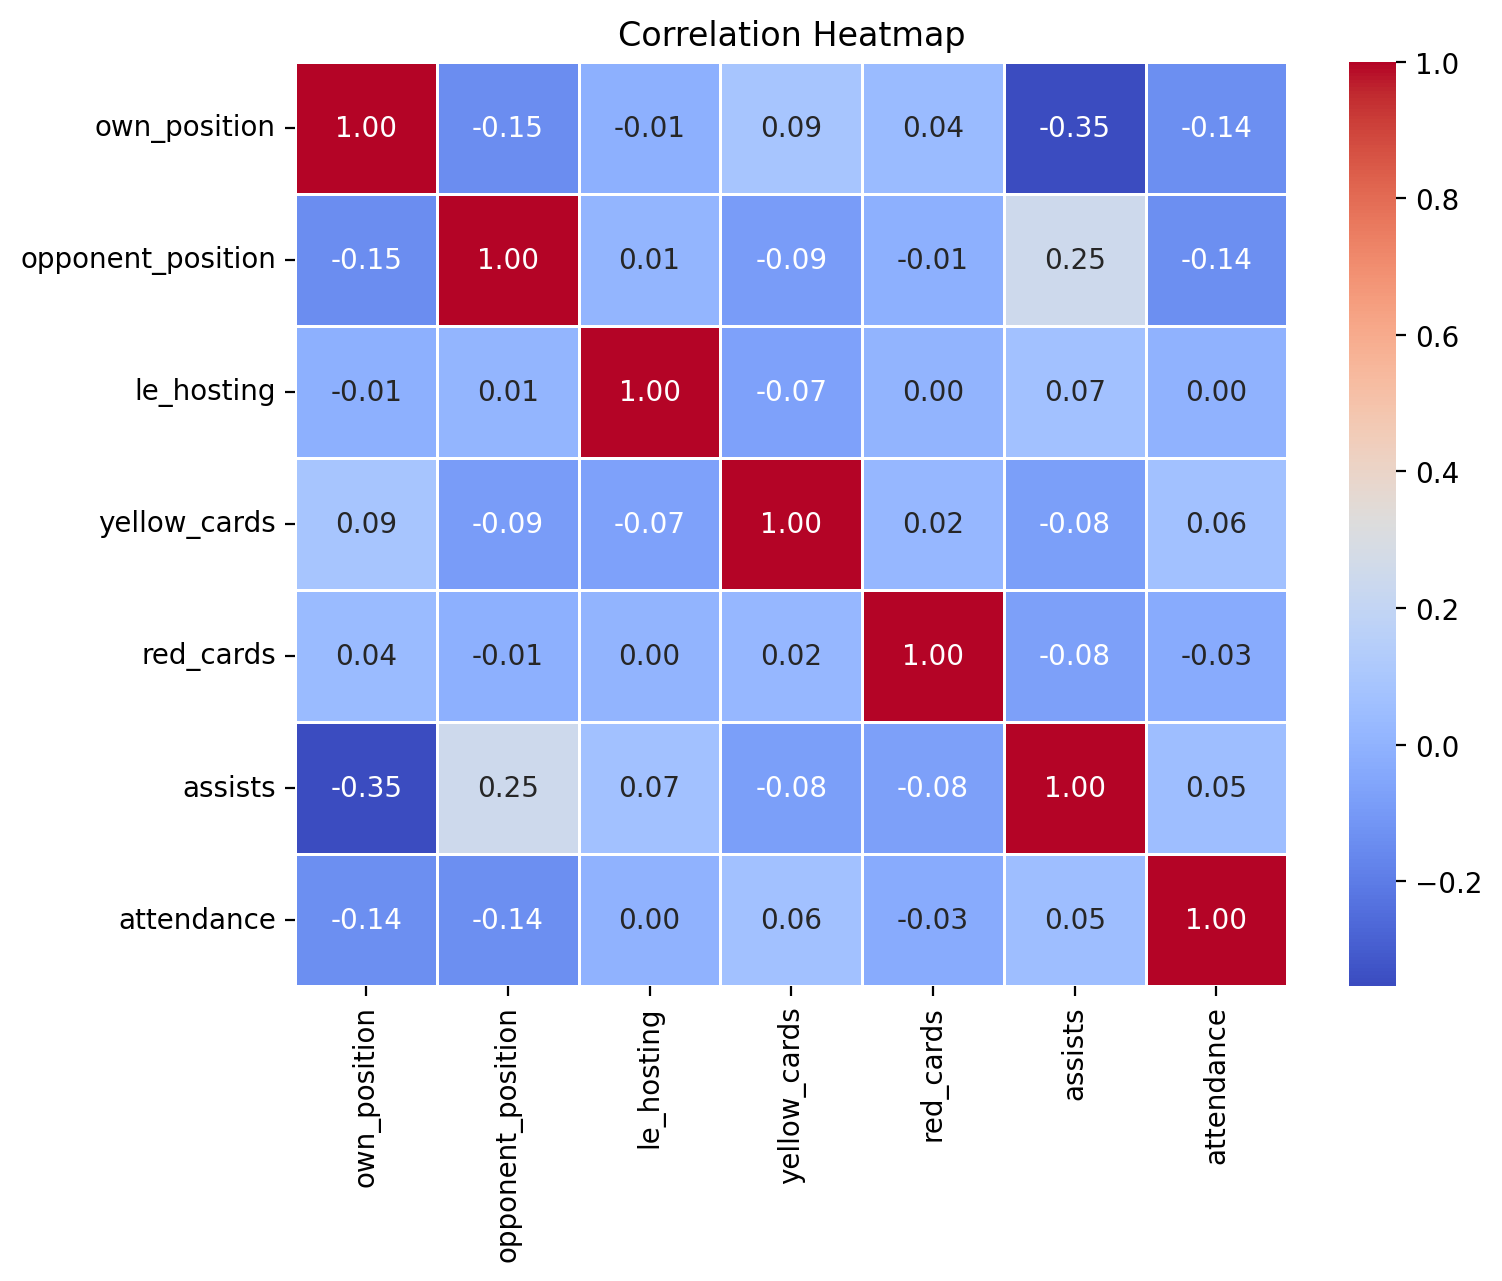

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [68]:
# assists와 own_posision만 상관관계가 조금 있어보이고 나머지는 처참하네....

In [69]:
master_df_m.columns

Index(['club_id', 'own_goals', 'own_position', 'own_manager_name',
       'opponent_id', 'opponent_goals', 'opponent_position',
       'opponent_manager_name', 'attendance', 'referee', 'hosting',
       'formation', 'yellow_cards', 'red_cards', 'assists', 'outcome',
       'le_hosting'],
      dtype='object')

In [70]:
master_df_m.head()

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,attendance,referee,hosting,formation,yellow_cards,red_cards,assists,outcome,le_hosting
0,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,Home,3-5-2 flat,2,0,0,0,1
1,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,Away,4-3-3 Attacking,1,0,3,2,0
2,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,20537.0,Mike Dean,Home,4-4-2,2,0,1,0,1
3,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,Away,4-2-3-1,3,0,1,2,0
4,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,40721.0,Mike Dean,Home,4-3-3 Attacking,2,0,1,1,1


In [71]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df_m['le_own_manager_name'] = label_encoder.fit_transform(master_df_m['own_manager_name'])

In [72]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df_m['le_opponent_manager_name'] = label_encoder.fit_transform(master_df_m['opponent_manager_name'])

In [73]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df_m['le_referee'] = label_encoder.fit_transform(master_df_m['referee'])

In [74]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df_m['le_formation'] = label_encoder.fit_transform(master_df_m['formation'])

In [75]:
master_df_m.head()

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,attendance,referee,...,formation,yellow_cards,red_cards,assists,outcome,le_hosting,le_own_manager_name,le_opponent_manager_name,le_referee,le_formation
0,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,...,3-5-2 flat,2,0,0,0,1,18,44,4,8
1,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,...,4-3-3 Attacking,1,0,3,2,0,44,18,4,15
2,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,20537.0,Mike Dean,...,4-4-2,2,0,1,0,1,32,34,21,18
3,985,2,8.0,José Mourinho,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,...,4-2-3-1,3,0,1,2,0,34,32,21,11
4,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,40721.0,Mike Dean,...,4-3-3 Attacking,2,0,1,1,1,44,34,21,15


In [76]:
master_df_m.head

<bound method NDFrame.head of       club_id  own_goals  own_position own_manager_name  opponent_id  \
0        1110          0          19.0     David Wagner          631   
1         631          3           2.0   Maurizio Sarri         1110   
2        1010          1           4.0      Javi Gracia          985   
3         985          2           8.0    José Mourinho         1010   
4         631          2           3.0   Maurizio Sarri          985   
...       ...        ...           ...              ...          ...   
4361     1237          1          15.0    Graham Potter         1132   
4362     1237          1          17.0    Graham Potter          148   
4363      148          0           5.0    José Mourinho         1237   
4364      148          1           4.0    Antonio Conte         1132   
4365     1132          0          17.0     Mike Jackson          148   

      opponent_goals  opponent_position opponent_manager_name  attendance  \
0                  3        

In [77]:
# 이상치 그리는게 의미가 없어보이는 데이터프레임

In [78]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [79]:
master_df_m.columns

Index(['club_id', 'own_goals', 'own_position', 'own_manager_name',
       'opponent_id', 'opponent_goals', 'opponent_position',
       'opponent_manager_name', 'attendance', 'referee', 'hosting',
       'formation', 'yellow_cards', 'red_cards', 'assists', 'outcome',
       'le_hosting', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_referee', 'le_formation'],
      dtype='object')

In [80]:
features2 = ['club_id', 'own_position', 'opponent_id', 'opponent_position', 'le_formation', 'yellow_cards', 'red_cards', 'assists',
       'le_hosting', 'le_own_manager_name', 'le_opponent_manager_name', 'le_referee']

In [81]:
# 독립변수와 종속변수 분리
X = master_df_m[features2]
y = master_df_m['outcome']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6498855835240275
F1 Score: 0.6055453357687297


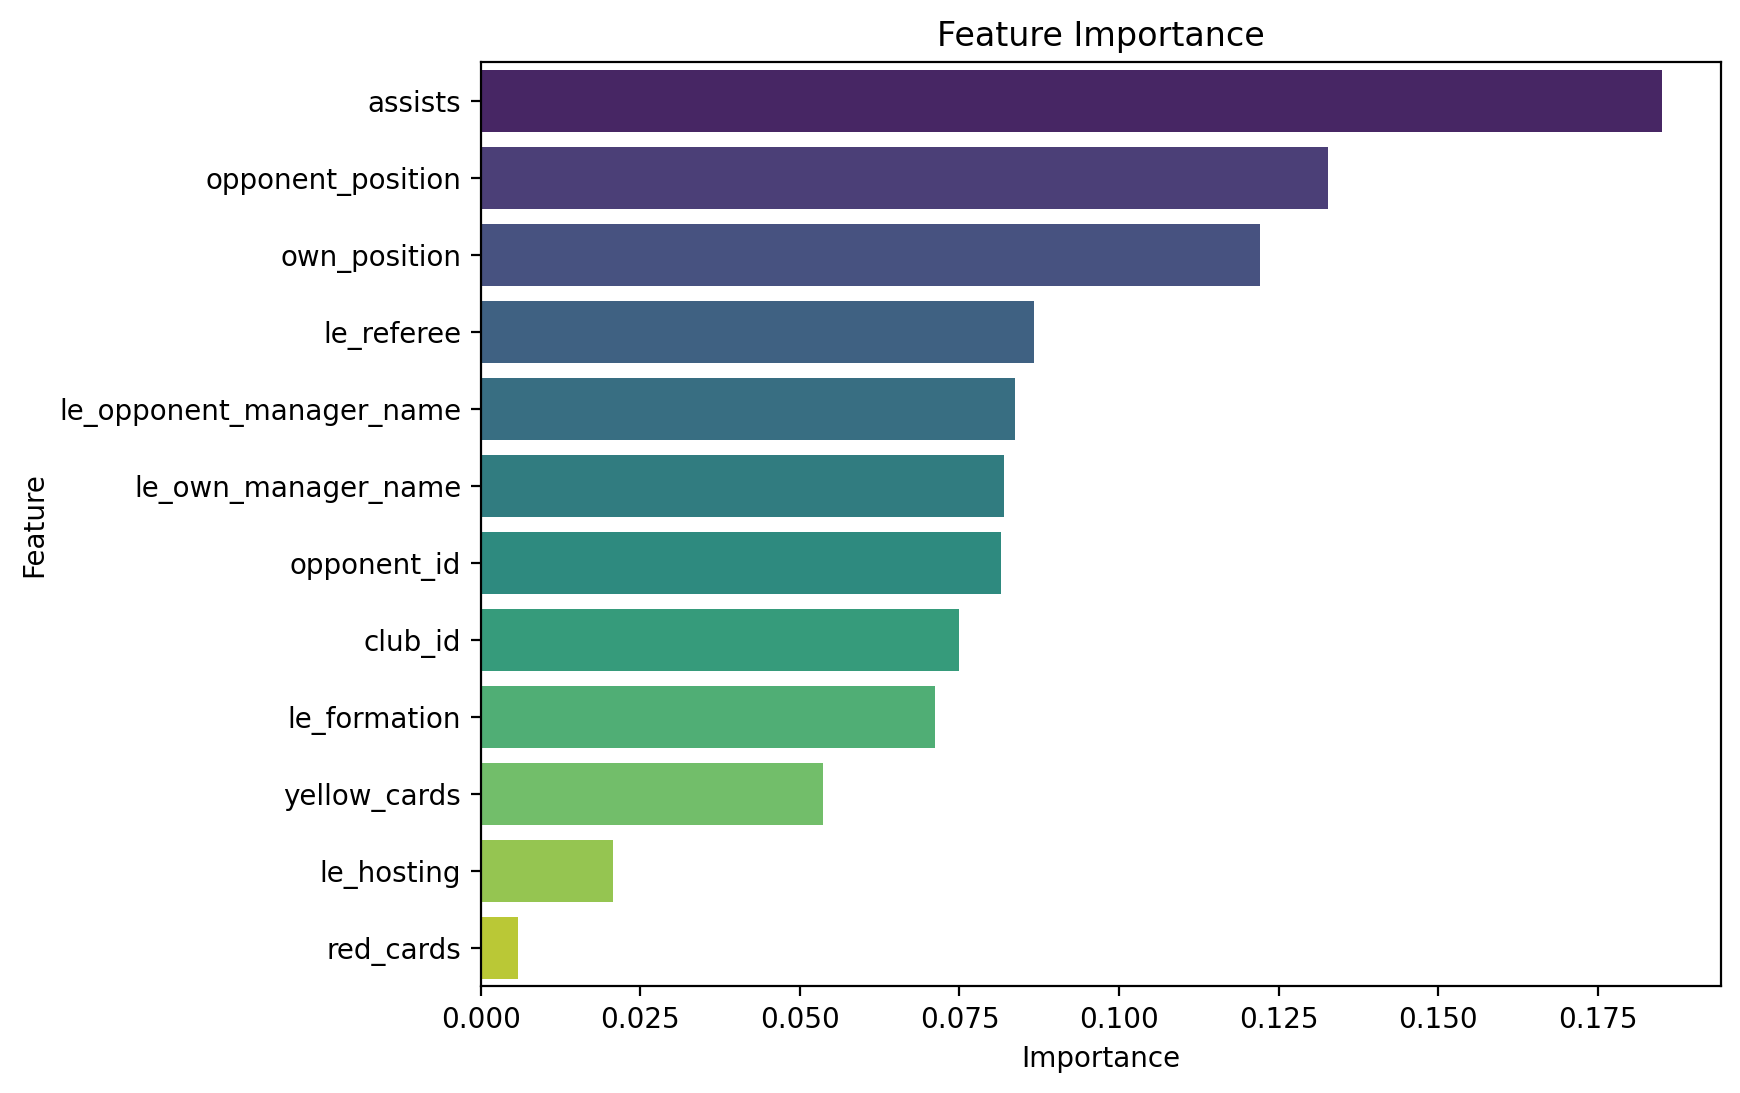

In [83]:
# 특성 중요도 추출
importances = rf_model.feature_importances_

# 특성 중요도를 데이터프레임에 저장
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 특성 중요도를 내림차순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 그래프 그리기 (x축과 y축을 바꿔서)
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [84]:
import xgboost as xgb

In [85]:
# XGBoost 모델 생성 및 학습, n_estimators=100
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [86]:
# 모델 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6167048054919908
F1 Score: 0.591172705861928


In [87]:
# XGBoost 모델 생성 및 학습, n_estimators=200
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# 모델 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6121281464530892
F1 Score: 0.5907597706984098


In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# 의사결정나무 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 모델 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5606407322654462
F1 Score: 0.5589744616932282


In [90]:
# 변수선택을 잘못 했으므로 다시 모델링

In [94]:
features3 = ['club_id', 'own_position', 'opponent_id', 'opponent_position', 'le_hosting', 'le_own_manager_name', 'le_opponent_manager_name', 'le_referee']

In [95]:
# 독립변수와 종속변수 분리
X = master_df_m[features3]
y = master_df_m['outcome']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5720823798627003
F1 Score: 0.5344737148106933


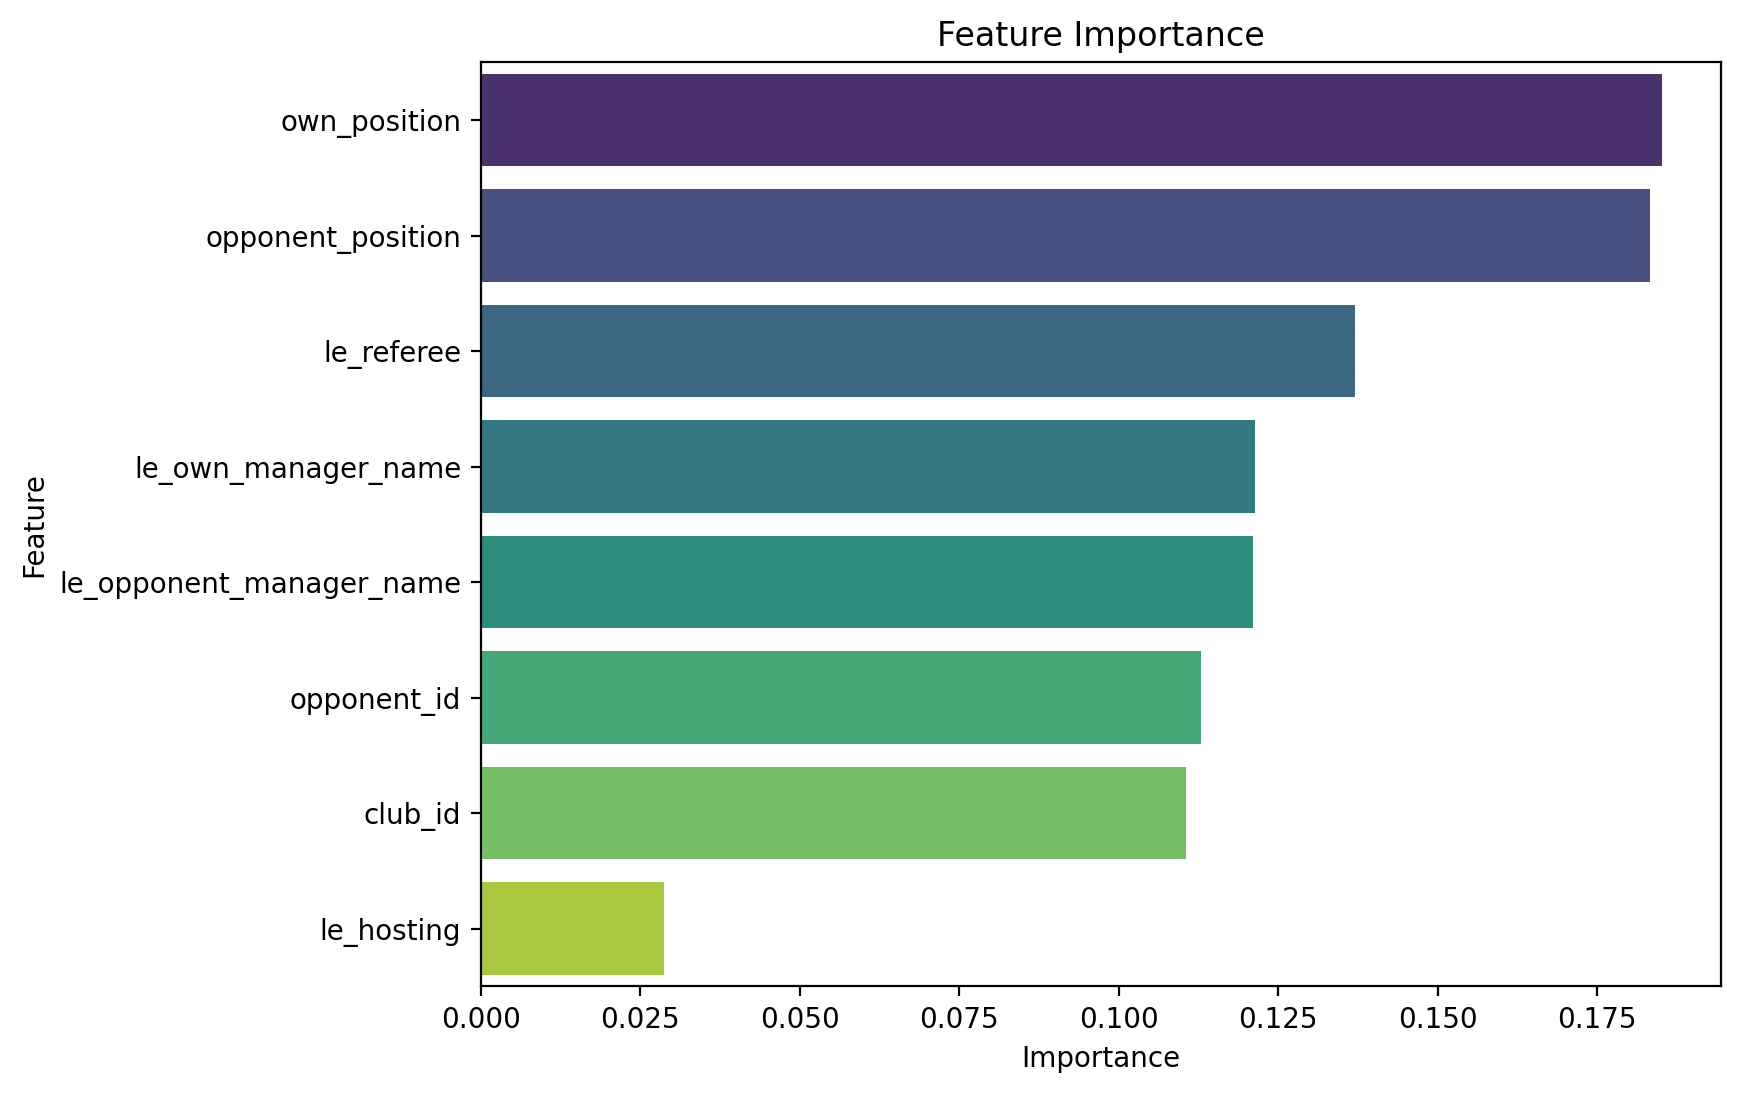

In [98]:
# 특성 중요도 추출
importances = rf_model2.feature_importances_

# 특성 중요도를 데이터프레임에 저장
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 특성 중요도를 내림차순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 그래프 그리기 (x축과 y축을 바꿔서)
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [99]:
# 의외로 home인지 away인지는 중요하지 않네?

In [100]:
# XGBoost 모델 생성 및 학습, n_estimators=100
xgb_model2 = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [101]:
# 모델 평가
y_pred = xgb_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5331807780320366
F1 Score: 0.5118421645379773


In [102]:
# 의사결정나무 모델 생성 및 학습
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(X_train, y_train)

# 모델 평가
y_pred = dt_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.448512585812357
F1 Score: 0.4476807391608178


In [104]:
# 이거 써서 하명 될 듯
# 예시 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15]
}
df = pd.DataFrame(data)

# 이동평균을 계산할 열 선택
columns = ['A', 'B', 'C']

# 이동평균을 구할 기간 설정 (예: 3개의 행을 기준으로 이동평균 계산)
window_size = 3

# 이동평균을 계산하여 기존 열에 덮어쓰기
df[columns] = df[columns].rolling(window=window_size).mean()

# 결과 출력
print(df)

     A    B     C
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  2.0  7.0  12.0
3  3.0  8.0  13.0
4  4.0  9.0  14.0
